## Análisis descriptivo de la base de datos 'Cars'

In [18]:
import pandas as pd
pd.options.display.max_columns =None
import matplotlib.pyplot as plt
#Se importa el módulo seaborn para realizar la gráfica
import seaborn as sns

In [19]:
#Importando la base de datos de Automoviles que está en formato csv para leerla como DataFrame de Pandas
df = pd.read_csv('cars.csv')

In [20]:
# Explorando los contenidos de la base de datos y los descriptivos de tendencia central para la variable precio
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


In [21]:
df['price_usd'].mean()

6639.971021255604

In [22]:
df['price_usd'].median()

4800.0

#### Al comparar el valor de la mediana y de la media y ver que están alejadas se puede inferir que no se trata de una distribución normal sino que es una distribución asimétrica

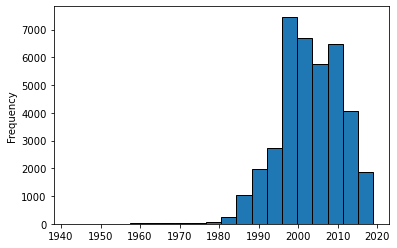

In [23]:
#Se Grafica la columna year_produced para ver la distribución de la antiguedad de los autos
df['year_produced'].plot.hist(bins=20, edgecolor="black") #20 segmentaciones o intervalos
plt.show()

#### La mayoria de los autos fueron construidos entre 1980 y 2020.

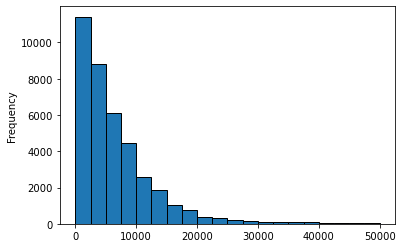

In [24]:
#Se grafica la columna price_usd para ver la distribucion de los precios de los autos
df['price_usd'].plot.hist(bins=20, edgecolor="black") #20 segmentaciones o intervalos
plt.show()

#### La mayoria de los autos estan entre 0 y 10.000 usd, pero tenemos varios casos atípicos.

#### Interesa saber como se distribuyen respecto al precio los vehiculos de transmisión automática respecto a los de transmisión mecánica.

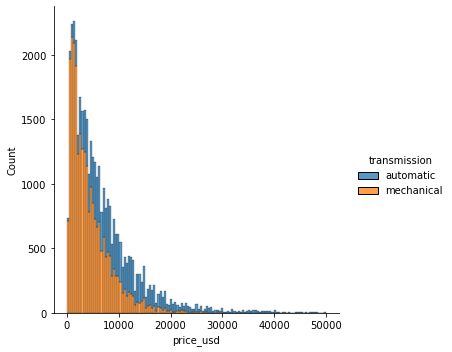

In [25]:
# En el gráfico se muestra para cada tipo de transmisión  (automática o manual) la distribución de precios
sns.displot(df, x='price_usd',hue='transmission', multiple='stack')
plt.show()

In [16]:
#Se va a contabilizar el número de vehiculos con cada tipo de transmisión
df.groupby('transmission').count()

,manufacturer_name,model_name,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
transmission,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
automatic,12898,12898,12898,12898,12898,12898,12898,12898,12888,12898,12898,12898,12898,12898,12898,12898,12898,12898,12898,12898,12898,12898,12898,12898,12898,12898,12898,12898,12898
mechanical,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633


##### Hay más del doble de autos Mecánicos que Automáticos

#### Se quiere saber si hay alguna relación entre el año en que son construidos y si el tipo de transmisión es automático a manual

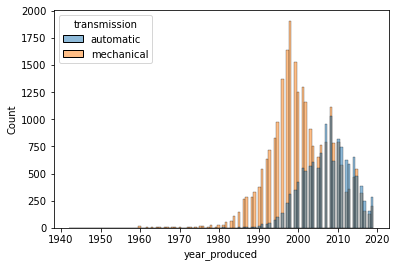

In [35]:
sns.histplot(df, x='year_produced', hue='transmission')
plt.show()

#### Se puede observar que con los años ha ido aumentando la cantidad de automóviles automático en desmedro de los que tienen transmisión manual, hasta pasar desde ser casi en su mayoría mecánicos para ser casi la misma proporción a partir del año 2005 aproximadamente.

#### Se separa la tabla para dejar sólo los autos automáticos y analizar su relación entre precio y año de fabricación

In [52]:
T_aut = df[(df['transmission']=='automatic')]
T_aut

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7
5,Subaru,Outback,automatic,silver,132449,2011,gasoline,False,gasoline,2.5,universal,False,owned,all,14700.00,True,Минская обл.,20,56,False,True,False,False,False,True,False,True,True,True,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38522,Chrysler,PT Cruiser,automatic,other,207605,2004,gasoline,False,gasoline,2.4,hatchback,False,owned,front,4000.00,False,Витебская обл.,8,44,False,True,False,False,False,False,False,False,False,False,221
38524,Chrysler,300,automatic,silver,240000,2001,gasoline,False,gasoline,3.5,sedan,False,owned,front,3000.00,True,Минская обл.,6,11,False,True,False,False,True,True,False,False,True,True,264
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,Минская обл.,5,85,False,True,False,False,True,True,False,False,True,True,301
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,Минская обл.,3,63,False,True,False,False,True,True,False,False,True,True,369


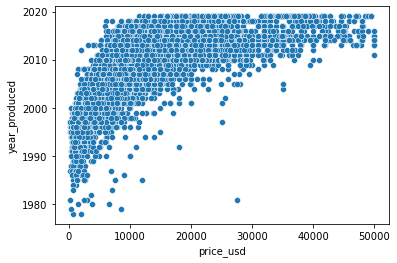

In [54]:
## Gráfico de correlación para ver si existe relación entre el precio y el año de fabricación en los autos automaticos
sns.scatterplot(x='price_usd', y='year_produced', data=T_aut)
plt.show()

#### Se separa la tabla para dejar sólo los autos mecánicos y analizar su relación entre precio y año de fabricación

In [55]:
# Se separa la tabla para dejar sólo los autos mecánicos
T_mec = df[(df['transmission']=='mechanical')]
T_mec

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
10,Subaru,Forester,mechanical,other,280000,2003,gasoline,False,gasoline,2.0,suv,False,owned,all,6900.00,True,Минская обл.,14,6,False,True,False,True,False,True,False,True,True,True,11
12,Subaru,Forester,mechanical,other,321000,2002,gasoline,False,gasoline,2.0,suv,False,owned,all,4300.00,False,Минская обл.,13,2,False,True,False,False,False,False,False,False,False,False,2
13,Subaru,Justy,mechanical,red,49999,2001,gasoline,False,gasoline,1.3,hatchback,False,owned,all,1666.00,False,Гомельская обл.,8,94,True,False,False,False,False,False,False,False,False,False,230
17,Subaru,Impreza,mechanical,blue,191000,2005,gasoline,False,gasoline,2.0,sedan,False,owned,all,10950.00,False,Минская обл.,12,7,False,True,False,False,False,False,False,False,False,True,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38521,Chrysler,Neon,mechanical,green,260000,1995,gasoline,False,gasoline,2.0,sedan,False,owned,front,550.00,True,Гродненская обл.,7,12,False,True,False,False,False,False,False,False,False,True,215
38523,Chrysler,Grand Voyager,mechanical,black,278000,1999,diesel,False,diesel,2.5,minivan,False,owned,front,4220.81,False,Брестская обл.,5,20,False,True,True,False,True,False,False,False,False,True,239
38525,Chrysler,Voyager,mechanical,violet,317000,1999,gas,True,gasoline,2.0,minivan,False,owned,front,3300.00,True,Брестская обл.,8,28,False,False,False,True,False,False,False,False,False,True,269
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,Брестская обл.,4,20,False,True,False,False,True,True,False,False,True,True,317


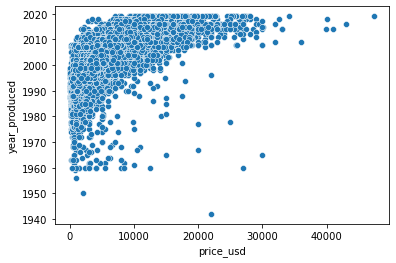

In [56]:
## Gráfico de correlación para ver si existe relación entre el precio y el año de fabricación en los autos mecanicos
sns.scatterplot(x='price_usd', y='year_produced', data=T_mec)
plt.show()

#### Interesa saber si existe alguna relación entre los precios para cada una de las categorías de transmisión

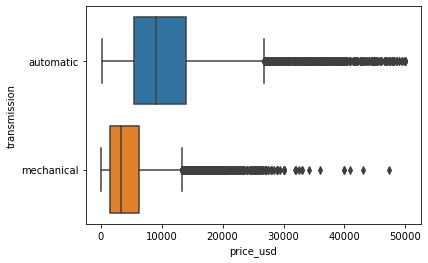

In [46]:
sns.boxplot(x='price_usd', y='transmission', data=df)
plt.show()

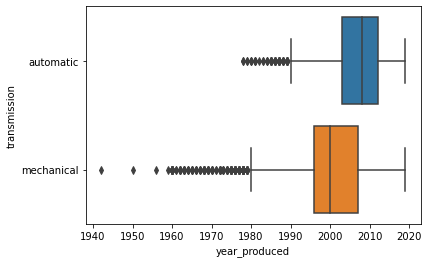

In [57]:
sns.boxplot(x='year_produced', y='transmission', data=df)
plt.show()

#### Conclusiones

- Se puede concluir que los automoviles mecánicos tienen fabricación predominante de mayor data, mientras que los automáticos han ido aumentando con el pasar de los años.

- La distribución de precios en el grupo de autos automáticos es más asimétrica hacia precio más altos que los autos mecánicos, probablemente porque coincide con que la fecha de fabricación también es posterior lo cual aumenta el valor de los vehículos.
